In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [2]:
generator = ImageDataGenerator(rescale=1/255)

#generator = ImageDataGenerator(rescale=1/255)

#Test_generator = ImageDataGenerator()


IMAGE_WIDTH=IMAGE_HEIGHT=150

train_dataset = generator.flow_from_directory("F:/Research/Tomograms interpolation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          #color_mode = 'rgb',
                                          class_mode = 'categorical',
                                          subset = 'training',
                                          shuffle=True,
                                          seed = 42
                                         )
                                   
val_dataset = generator.flow_from_directory("F:/Research/val",
                                          target_size=(150,150),
                                          batch_size =32,
                                          #color_mode = 'rgb',
                                          #subset = 'validation',
                                          class_mode = 'categorical')

#Test_dataset = Test_generator.flow_from_directory('F:/Research/val',target_size=(150,150))


Found 6868 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [3]:
print(train_dataset.class_indices)

{'infocus': 0, 'outfocus': 1}


In [4]:
num_classes = 2
from tensorflow.keras.models import Sequential



img_height=img_width=150


model = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
#model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
#model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(218,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(2,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 150, 150, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 150, 150, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
epochs = 10
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10
215/215 [==============================] - 55s 239ms/step - loss: 0.2541 - accuracy: 0.8874 - val_loss: 0.3015 - val_accuracy: 0.8155
Epoch 2/10
215/215 [==============================] - 50s 234ms/step - loss: 0.1896 - accuracy: 0.9139 - val_loss: 0.3089 - val_accuracy: 0.8350
Epoch 3/10
215/215 [==============================] - 52s 243ms/step - loss: 0.1485 - accuracy: 0.9329 - val_loss: 0.3145 - val_accuracy: 0.8738
Epoch 4/10
215/215 [==============================] - 52s 240ms/step - loss: 0.1245 - accuracy: 0.9482 - val_loss: 0.3945 - val_accuracy: 0.8155
Epoch 5/10
215/215 [==============================] - 51s 237ms/step - loss: 0.1150 - accuracy: 0.9480 - val_loss: 0.3714 - val_accuracy: 0.8544
Epoch 6/10
215/215 [==============================] - 51s 236ms/step - loss: 0.1080 - accuracy: 0.9531 - val_loss: 0.4216 - val_accuracy: 0.8447
Epoch 7/10
215/215 [==============================] - 51s 235ms/step - loss: 0.0941 - accuracy: 0.9635 - val_loss: 0.3831 - val_ac

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


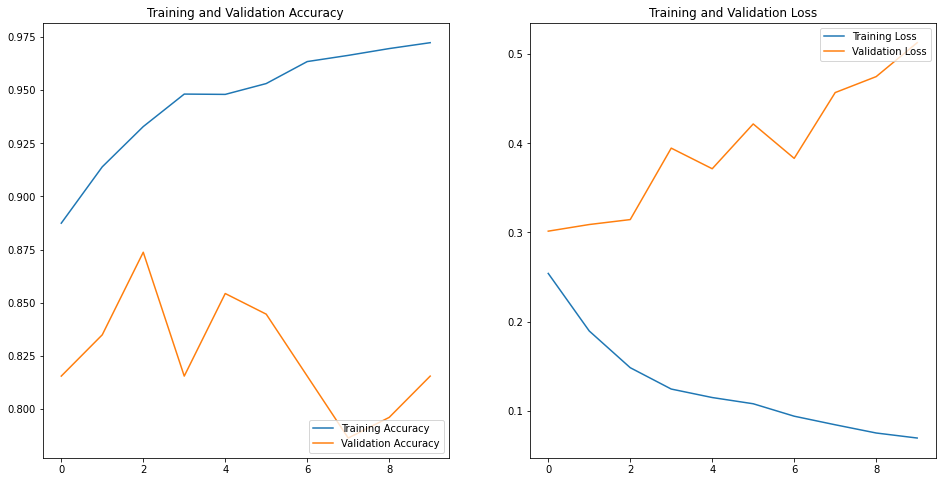

In [9]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:

from tensorflow.keras.applications.imagenet_utils import decode_predictions

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
    
    #Y = image.img_to_array(img1)/255
     
    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    
    val = model.predict_proba(X)
    #val = np.argmax(model.predict(X), axis=-1)
    #decode_predictions(val)[0]
    print(val)
    '''
    if val[0][1] == 0:
        
        plt.xlabel("infocus",fontsize=30)
        
    
    elif val[0][1] == 1:
        
        plt.xlabel("outfocus",fontsize=30)
    '''

c:\users\clive\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[0. 1.]]


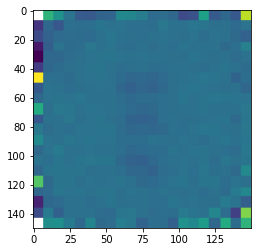

In [11]:
zplane = 80
#interpolation = 'bessel'
predictImage('F:/Research/Test/multi_lead_constrained_none_img{}.png'.format(zplane))
#predictImage(r'F:/Research/val/{}_img{}.png'.format(interpolation,pre_image))

In [209]:
def getFocus(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    z = int(filename.split("_img")[-1].split(".")[0])
   # plt.imshow(img1)
     
    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    
    val = model.predict(X)
    print(z)
    if val[0][1] == 0:
        return "infocus", z
    #    plt.xlabel("infocus",fontsize=30)
        
    
    elif val[0][1] == 1:
        return "outfocus", z
        #plt.xlabel("outfocus",fontsize=30)#
    
    else:
        return "confused", z

In [210]:
direc = "F:/Research/Test"

import glob

focus_label = []
z_plane = []

for pic in glob.glob(direc+"/*png"):
    f, z = getFocus(pic)
    focus_label.append(f)
    z_plane.append(z)

10
100
101
102
103
104
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
6
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
8
80
81
82
83
84
85
86
87
88
89
9
90
91
92
93
94
95
96
97
98
99


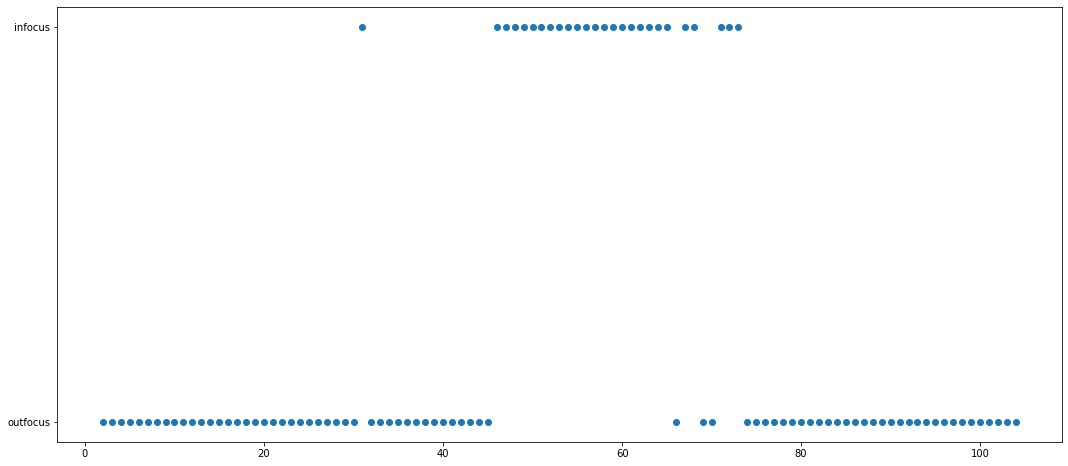

In [211]:
plt.figure(figsize=(18,8))
plt.scatter(z_plane, focus_label)
plt.show()

In [20]:
val = []
z_plane = []

def get_best_image(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    z = int(filename.split("_img")[-1].split(".")[0])
   # plt.imshow(img1)
 
    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    
    val.append(model.predict(X))
    z.append(z_plane)
    
    vaL_z_dict = dict(zip(z,val)) 
    
    return val_z_dict
    

In [212]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
